In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.utils.class_weight import compute_class_weight

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import io
import random
import shutil
from PIL import Image


import time
from tqdm import tqdm

## Check how many class do we have

In [2]:
class_names = os.listdir("img_all_weight_15/")
class_names

['17_Soleirolia soleirolii',
 '20_Gerbera Daisy',
 '26_Nymphaea',
 '29_Iris  plant',
 '30_Lavandula plant',
 'Chinese Elm Bonsai',
 'Haworthiopsis fasciata',
 'Hypoestes phyllostachya',
 'Kalanchoe thyrsiflora',
 'Lithops']

## Extract Data

In [89]:
count = 0
count_gambar_foler = []
random.seed(42)
path = r"E:\jupyter\Bangkit\capstone project\img_all_weight_15"
for i in tqdm(os.listdir(path)):
    for img in os.listdir(os.path.join(path,i)):
        num = np.random.randint(10000)
        img_read = load_img(os.path.join(path,i,img))
        img_read = img_to_array(img_read)
        img_shape = img_read.shape
        if img_shape[2]!=3:
            print(os.path.join(path,i,img))
            print(img_read.shape)
            plt.imshow(img_read)
            plt.axis('off')
            plt.show()
            count+=1
            dest = os.path.join("prep_all_img_wrong_shape",f"{num}.jpg")
            #shutil.move(os.path.join(path,i,img),dest)
print(f"{count} images are wrong shapes")


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

0 images are wrong shapes


In [2]:
count = 0
count_gambar_foler = []
path = r"E:\jupyter\Bangkit\capstone project\img_all_weight_15"
for i in os.listdir(path):
    banyak_folder = len(os.listdir(path))
    banyak_gambar = len(os.listdir(os.path.join(path,i)))
    print(f"Banyak gambar file {i}: {banyak_gambar}")
    count+=len(os.listdir(os.path.join(path,i)))
    count_gambar_foler.append(len(os.listdir(os.path.join(path,i))))
print(f"Banyak gambar: {count}")
print(f"Rata-rata:{(count/banyak_folder):.2f}")
print(f"Banyak Folder:{banyak_folder}")
print(f"Gambar paling sedikit pada folder: {np.array(count_gambar_foler).min()}")
        

Banyak gambar file 17_Soleirolia soleirolii: 566
Banyak gambar file 20_Gerbera Daisy: 605
Banyak gambar file 26_Nymphaea: 764
Banyak gambar file 29_Iris  plant: 729
Banyak gambar file 30_Lavandula plant: 735
Banyak gambar file Chinese Elm Bonsai: 482
Banyak gambar file Haworthiopsis fasciata: 478
Banyak gambar file Hypoestes phyllostachya: 707
Banyak gambar file Kalanchoe thyrsiflora: 656
Banyak gambar file Lithops: 616
Banyak gambar: 6338
Rata-rata:633.80
Banyak Folder:10
Gambar paling sedikit pada folder: 478


### Visualize the data

In [5]:
train_dir = r"E:\jupyter\Bangkit\capstone project\img_dir_all\train"
test_dir = r"E:\jupyter\Bangkit\capstone project\img_dir_all\test"

In [3]:
def view_random_image(target_dir,target_class):
    full_path_class = os.path.join(target_dir,target_class)
    plt.figure()
    for i in range(1,9):
        plt.subplot(3,3,i)
        pick_one_image = random.choice(os.listdir(full_path_class))

        full_path_image = os.path.join(full_path_class,pick_one_image)

        img = plt.imread(full_path_image)/255.
        print(f"Image shape: {img.shape}")
        plt.imshow(img)
        plt.axis("off")
        plt.show()
     
    
    
    

Image shape: (171, 295, 3)


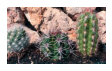

Image shape: (194, 259, 3)


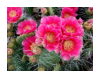

Image shape: (162, 310, 3)


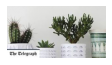

Image shape: (225, 225, 3)


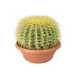

Image shape: (183, 275, 3)


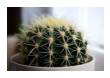

Image shape: (183, 275, 3)


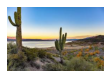

Image shape: (259, 194, 3)


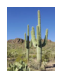

Image shape: (166, 303, 3)


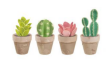

In [5]:
#train_dir
view_random_image(train_dir,"18_Cacti")

### Train Test Split Data

In [ ]:
import shutil
random.seed(42)
path = r"E:\jupyter\Bangkit\capstone project\img_all"
target = "img_prep_all"
for i in tqdm(os.listdir(path)):
    images_file = os.listdir(os.path.join(path,i))
    random.shuffle(images_file)

    for index,t in enumerate(images_file,start=1):
        original = os.path.join(path,i,t)
        if not os.path.exists(os.path.join(target,i)):
            os.mkdir(os.path.join(target,i))
        targets =os.path.join(target,i,t)
        shutil.copyfile(original, targets)
        if index==460:
            break

### Train Data Folder
* pick random image from img folder to img_dir, and put it into train folder

In [11]:
import shutil
path=r"E:\jupyter\Bangkit\capstone project\img_prep_all"
target="img_dir_all"
random.seed(42)
for i in tqdm(os.listdir(path)):
    images_file = os.listdir(os.path.join(path,i))
    random.shuffle(images_file)
    train_num = len(os.listdir(os.path.join(path,i)))-int(0.1*len(os.listdir(os.path.join(path,i))))
    for index,t in enumerate(images_file,start=1):
        original = os.path.join(path,i,t)
        if not os.path.exists(os.path.join(target,"train",i)):
            os.mkdir(os.path.join(target,"train",i))
        dest =os.path.join(target,"train",i,t)
        shutil.move(original, dest)
        if index== train_num:
            break

100%|██████████| 52/52 [00:04<00:00, 11.12it/s]


### Test Data Folder
* pick random image from img folder to img_dir, and put it into test folder

In [12]:
path=r"E:\jupyter\Bangkit\capstone project\img_prep_all"
target="img_dir_all"
for i in tqdm(os.listdir(path)):
    images_file = os.listdir(os.path.join(path,i))
    
    for index,t in enumerate(images_file,start=1):
        original = os.path.join(path,i,t)
        if not os.path.exists(os.path.join(target,"test",i)):
            os.mkdir(os.path.join(target,"test",i))
        dest =os.path.join(target,"test",i,t)
        
        shutil.move(original, dest)
       

100%|██████████| 52/52 [00:00<00:00, 84.55it/s]


### Setup data inputs

In [6]:

IMG_SIZE = (224, 224)
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    height_shift_range=0.2,
    width_shift_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    color_mode='rgb'
)

test_data = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    shuffle=False
)



Found 5710 images belonging to 10 classes.
Found 628 images belonging to 10 classes.


In [7]:
y_train=train_data.classes

In [8]:
class_weight = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(y_train),
                                    y=y_train)
class_weight= 1/class_weight

weight = {i : class_weight[i] for i in range(10)}

### Create Model using MobileNetv2

In [9]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

In [10]:
tf.random.set_seed(42)
base_model = tf.keras.applications.MobileNetV2(include_top=False)
base_model.trainable= False

inputs = layers.Input(shape=(224,224,3),name = "input_shape",dtype=tf.float16)
x = base_model(inputs,training=False)
x = layers.GlobalAvgPool2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(len(class_names),activation='softmax',dtype=tf.float32,name='outputs')(x)

model_2 = Model(inputs,outputs)

model_2.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 outputs (Dense)             (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [61]:
callback_model2 = ModelCheckpoint("checkpoint_all/model2_15Data_trad_classWeight_v2.h5")

In [11]:
history_model2 = model_2.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 validation_steps=int(0.15 * len(test_data)), 
                               #  callbacks=[callback_model2],
                            class_weight=weight)

Epoch 1/10
179/179 [==============================] - 95s 466ms/step - loss: 0.9208 - accuracy: 0.7187 - val_loss: 0.6532 - val_accuracy: 0.8125
Epoch 2/10
179/179 [==============================] - 66s 370ms/step - loss: 0.4692 - accuracy: 0.8608 - val_loss: 0.4006 - val_accuracy: 0.8646
Epoch 3/10
179/179 [==============================] - 69s 383ms/step - loss: 0.3789 - accuracy: 0.8844 - val_loss: 0.4242 - val_accuracy: 0.8750
Epoch 4/10
179/179 [==============================] - 68s 379ms/step - loss: 0.3341 - accuracy: 0.9009 - val_loss: 0.3372 - val_accuracy: 0.9167
Epoch 5/10
179/179 [==============================] - 67s 374ms/step - loss: 0.2902 - accuracy: 0.9126 - val_loss: 0.3839 - val_accuracy: 0.8750
Epoch 6/10
179/179 [==============================] - 66s 366ms/step - loss: 0.2768 - accuracy: 0.9156 - val_loss: 0.3725 - val_accuracy: 0.9062
Epoch 7/10
179/179 [==============================] - 66s 368ms/step - loss: 0.2534 - accuracy: 0.9205 - val_loss: 0.4000 - val_ac

In [63]:
model = load_model("checkpoint_all/model2_15Data_trad_classWeight.h5")

In [12]:
model_2.evaluate(test_data)

20/20 [==============================] - 4s 183ms/step - loss: 0.3106 - accuracy: 0.9061


[0.3105953633785248, 0.906050980091095]

In [13]:
base_model.trainable = True
for layer in base_model.layers[:-5]:
    layer.trainable = False

In [66]:
callback_model2_tuning = ModelCheckpoint("checkpoint_all/model2_tuning_15Data_classweight_trad_v2",save_best_only=True)

In [14]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

In [15]:
fine_tune_epochs = 20

history_model2_tuning = model_2.fit(train_data,
                                     epochs=fine_tune_epochs,
                                     validation_data=test_data,
                                     validation_steps=int(0.15 * len(test_data)), # validate on 15% of the test data
                                     initial_epoch=history_model2.epoch[-1],
                                       # callbacks=[callback_model2_tuning,reduce_lr],
                                   class_weight=weight) # 

Epoch 10/20
179/179 [==============================] - 70s 367ms/step - loss: 0.2735 - accuracy: 0.9138 - val_loss: 0.4837 - val_accuracy: 0.8750
Epoch 11/20
179/179 [==============================] - 66s 367ms/step - loss: 0.2083 - accuracy: 0.9343 - val_loss: 0.3410 - val_accuracy: 0.9271
Epoch 12/20
179/179 [==============================] - 66s 371ms/step - loss: 0.1788 - accuracy: 0.9408 - val_loss: 0.2517 - val_accuracy: 0.9375
Epoch 13/20
179/179 [==============================] - 65s 364ms/step - loss: 0.1499 - accuracy: 0.9504 - val_loss: 0.5211 - val_accuracy: 0.8333
Epoch 14/20
179/179 [==============================] - 62s 347ms/step - loss: 0.1410 - accuracy: 0.9506 - val_loss: 0.2434 - val_accuracy: 0.9271
Epoch 15/20
179/179 [==============================] - 62s 348ms/step - loss: 0.1109 - accuracy: 0.9662 - val_loss: 0.4010 - val_accuracy: 0.9167
Epoch 16/20
179/179 [==============================] - 63s 350ms/step - loss: 0.0990 - accuracy: 0.9678 - val_loss: 0.3330 -

In [18]:
model_2.evaluate(test_data)

20/20 [==============================] - 2s 123ms/step - loss: 0.2447 - accuracy: 0.9315


[0.24471695721149445, 0.9315286874771118]

In [16]:
def compare_historys(original_history, new_history, initial_epochs=5,name_model="anone"):
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(f"{name_model} Evaluate Graph")
    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]



    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

Model_2 with fine tuning Evaluate Graph


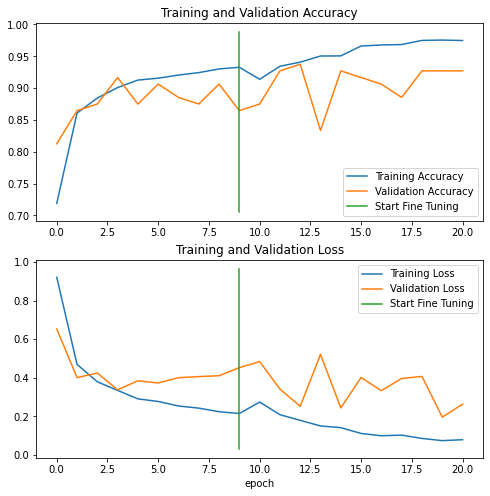

In [17]:
compare_historys(history_model2,history_model2_tuning,10,"Model_2 with fine tuning")

## Evaluating Model

In [5]:
load_model_2_tuning = load_model("checkpoint_all/model2_tuning_15Data_classweight_trad")

In [10]:
load_model_2_tuning.evaluate(test_data)

20/20 [==============================] - 2s 52ms/step - loss: 0.1996 - accuracy: 0.9443


[0.19961543381214142, 0.9442675113677979]

In [12]:
from sklearn.metrics import classification_report

In [10]:
y_pred = load_model_2_tuning.predict(test_data).argmax(axis=1)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 5, 0, 0], dtype=int64)

In [13]:
print(classification_report(test_data.classes,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        56
           1       0.92      0.98      0.95        60
           2       0.93      1.00      0.96        76
           3       0.92      0.96      0.94        72
           4       0.92      0.92      0.92        73
           5       0.91      0.88      0.89        48
           6       0.96      0.94      0.95        47
           7       0.97      0.97      0.97        70
           8       0.98      0.95      0.97        65
           9       1.00      0.93      0.97        61

    accuracy                           0.94       628
   macro avg       0.95      0.94      0.94       628
weighted avg       0.95      0.94      0.94       628



In [37]:
path_pred = r"E:\jupyter\Bangkit\capstone project\img_dir_all\train\26_Nymphaea\img_9.jpg"

In [38]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [39]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [51]:
def img_prep_predict(path):
    img = load_img(path, target_size=(224, 224))
    img = img_to_array(img)
    img=tf.expand_dims(img,axis=0)
    img = img/255.
    return img

In [83]:
img = img_prep_predict(path_pred)

In [93]:
load_model_2_tuning.predict(img).argmax(axis=1)

array([2], dtype=int64)

In [92]:
class_names[2]

'26_Nymphaea'